## Observations and Insights 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# File paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results,on=["Mouse ID"])

# Display merged data table
mouse_study_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
#Checking the number of mic
mice_count = len(mouse_study_complete["Mouse ID"].unique())
print(mice_count)

249


In [74]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicaterows = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"] 
print(duplicaterows)

#can likely delete this
#drop formula g989 

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [75]:
# I don't think need this. Important part was dropping the duplicate

# Optional: Get all the data for the duplicate mouse ID. 
# instructor note: use loc with result of previous cell

In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates_dropped = mouse_study_complete.drop_duplicates(subset = "Mouse ID", keep='first')
duplicates_dropped

# this seems repetitive. I think it works without it.
# mouse_study_no_duplicates=pd.DataFrame(duplicates_dropped)
# mouse_study_no_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [77]:
# Checking the number of mice in the clean DataFrame.
mice_count_no_duplicates = len(duplicates_dropped["Mouse ID"].unique())
print(mice_count_no_duplicates)

249


## Summary Statistics

In [78]:
# The numbers are all the same. I don't think this is correct. 
# Ideally there would be summary statistics here, but yes my output from these questions doesn't look correct. Could I look at another one of the fields?


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = duplicates_dropped.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume = duplicates_dropped.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

#variance 
var_volume = duplicates_dropped.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

#standard deviation 
std_volume = duplicates_dropped.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary dataframe.
complete_volume_df = pd.DataFrame({"Mean": mean_volume,
                              "Median": median_volume,
                              "Variance": var_volume,
                              "Standard Deviation": std_volume})

complete_volume_df


,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,45.0,45.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0


In [79]:
#This does not look correct.. 

# Generate a summary statistics table of mean, median, variance, standard deviation, and of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
complete_volume_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var","std"])


Mean                Median                Variance             \
              mean median var std   mean median var std     mean median var   
Drug Regimen                                                                  
Capomulin     45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Ceftamin      45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Infubinol     45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Ketapril      45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Naftisol      45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Placebo       45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Propriva      45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Ramicane      45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Stelasyn      45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   
Zoniferol     45.0   45.0 NaN NaN   45.0   45.0 NaN NaN      0.0    0.0 NaN   

                 Standard Deviation                 
             std               mean median var std  
Drug Regimen                                        
Capomulin    NaN                0.0    0.0 NaN NaN  
Ceftamin     NaN                0.0    0.0 NaN NaN  
Infubinol    NaN                0.0    0.0 NaN NaN  
Ketapril     NaN                0.0    0.0 NaN NaN  
Naftisol     NaN                0.0    0.0 NaN NaN  
Placebo      NaN                0.0    0.0 NaN NaN  
Propriva     NaN                0.0    0.0 NaN NaN  
Ramicane     NaN                0.0    0.0 NaN NaN  
Stelasyn     NaN                0.0    0.0 NaN NaN  
Zoniferol    NaN                0.0    0.0 NaN NaN

## Bar and Pie Charts

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group by drug regimen
# Sum Timepoint row
drug_regimen = mouse_study_complete.groupby("Drug Regimen").sum("Timepoint")
drug_regimen



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,3095,4592,4960,9355.420462,164
Ceftamin,2358,4877,3515,9361.228582,210
Infubinol,2889,4841,3235,9413.493529,171
Ketapril,2944,5238,3705,10384.299876,244
Naftisol,2232,5053,3650,10105.671026,220
Placebo,1943,5055,3380,9780.078122,261
Propriva,1754,4354,2715,8423.930878,157
Ramicane,2436,4487,4885,9169.417875,125
Stelasyn,2314,5042,3480,9816.199991,158


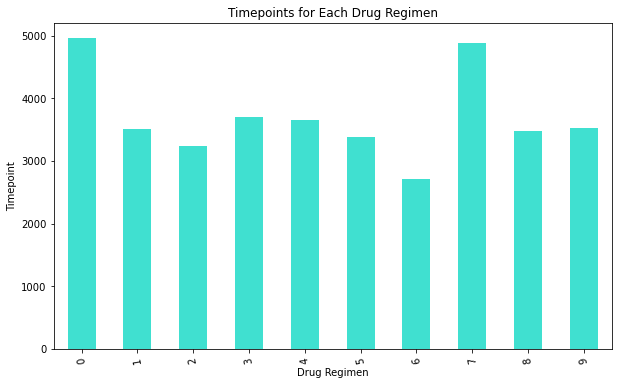

<Figure size 432x288 with 0 Axes>

In [101]:
#Create a bar chart

#this using Pandas' built-int plotting functions to create the bar chart

#is sum needed here if I summed above?
count_timepoints= drug_regimen["Timepoint"].sum()
count_chart = drug_regimen["Timepoint"].plot(kind='bar', figsize=(10,6), color="turquoise")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Timepoint")
count_chart.set_title("Timepoints for Each Drug Regimen")

#Rotate X axis
plt.xticks(rotation=100) 

plt.show()
plt.tight_layout()

In [90]:
drug_regimen.reset_index(inplace=True) 
drug_regimen

,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,3095,4592,4960,9355.420462,164
1,Ceftamin,2358,4877,3515,9361.228582,210
2,Infubinol,2889,4841,3235,9413.493529,171
3,Ketapril,2944,5238,3705,10384.299876,244
4,Naftisol,2232,5053,3650,10105.671026,220
5,Placebo,1943,5055,3380,9780.078122,261
6,Propriva,1754,4354,2715,8423.930878,157
7,Ramicane,2436,4487,4885,9169.417875,125
8,Stelasyn,2314,5042,3480,9816.199991,158
9,Zoniferol,2293,5040,3525,9689.044192,224


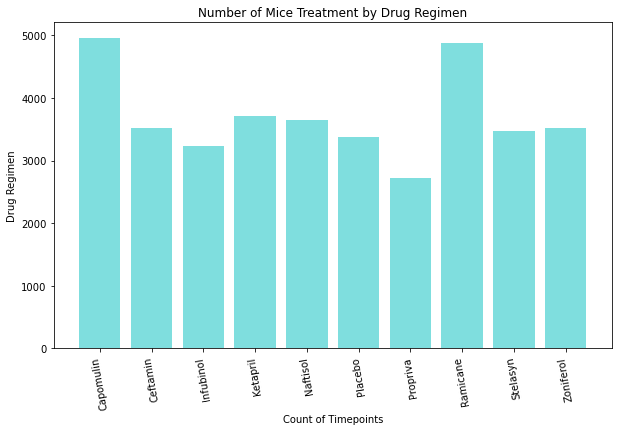

In [99]:
timepoint=drug_regimen["Timepoint"]
x_axis =drug_regimen["Drug Regimen"]
plt.figure(figsize=(10, 6))
plt.bar(x_axis, timepoint, color='c', alpha=0.5, align="center")

plt.title("Number of Mice Treatment by Drug Regimen")
plt.xlabel("Count of Timepoints")
plt.ylabel("Drug Regimen")

#Rotate X axis
xticks = plt.xticks(rotation=100) 

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a pie chart from the DataFrame
# Use the 'Value' column as the data to represent in the pie chart
mouse_study_complete.plot.pie(y=['Sex'], labels=mouse_study_complete['Sex'], autopct='%1.1f%%', startangle=90)

# Add title 
plt.title("Pie Chart Example")

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.
plt.show()

TypeError: Int64Index.name must be a hashable type

([<matplotlib.patches.Wedge at 0x7fc71d1a9700>,
 [Text(-0.5558888753939304, -1.0067211918963817, 'Females'),
  Text(0.531719793855064, 0.9629507052921912, 'Males')],
 [Text(-0.314198060005265, -0.5690163258544765, '50.608%'),
  Text(0.2900289784663985, 0.525245839250286, '49.392%')])

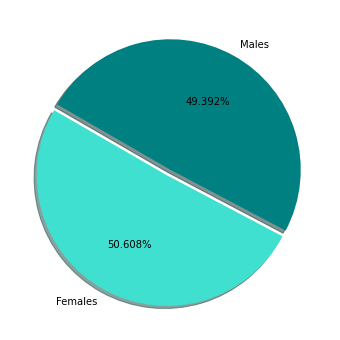

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mouse_study_complete.value_counts("Sex")
labels= ["Females", "Males"]
colors = ["turquoise", "teal"]
explode = (0.05,0)

fig = plt.figure(figsize=(6, 6), facecolor='white')

plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.3f%%", shadow=True, startangle=150)
 

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

#Group by drug regimen 
adjusted_mouse_data = mouse_study_complete.groupby("Mouse ID")["Timepoint"].max()

#Rename this datafram
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
another_adjusted_mouse_data = pd.merge(mouse_study_complete,adjusted_mouse_data,on=["Mouse ID"])

#Reset the index 
setting_index = another_adjusted_mouse_data.set_index("Drug Regimen")
setting_index


,Mouse ID,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
Drug Regimen,,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0,45
Ramicane,k403,Male,21,16,5,38.825898,0,45
Ramicane,k403,Male,21,16,10,35.014271,1,45
Ramicane,k403,Male,21,16,15,34.223992,1,45
Ramicane,k403,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2,45
Naftisol,z969,Male,9,30,30,65.841013,3,45
Naftisol,z969,Male,9,30,35,69.176246,4,45


In [ ]:
# Put treatments into a list
four_treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#for loop 
for treatment in four_treatments: 
    each_treatment = another_adjusted_mouse_data.loc[another_adjusted_mouse_data["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]

    tumor_vol_data.append(each_treatment)

    # Calculate the IQR
    quartiles= each_treatment.quantile([0.25,0.5,0.75])
    lowerq = quartiles[.25]
    upperq = quartiles[0.75]
    iqr = lowerq-upperq

    print(f"The lower quartile of tumor vol data is: {lowerq}")
    print(f"The upper quartile of tumor vol data is: {upperq}")
    print(f"The interquartile range of tumor vol data is: {iqr}")
    print(f"The the median of tumor vol data is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



The lower quartile of tumor vol data is: 37.685932865
The upper quartile of tumor vol data is: 45.0
The interquartile range of tumor vol data is: -7.314067135000002
The the median of tumor vol data is: 41.557808879999996 
Values below 48.6570335675 could be outliers.
Values above 34.0288992975 could be outliers.
The lower quartile of tumor vol data is: 36.674634585
The upper quartile of tumor vol data is: 45.0
The interquartile range of tumor vol data is: -8.325365415
The the median of tumor vol data is: 40.67323554 
Values below 49.1626827075 could be outliers.
Values above 32.511951877499996 could be outliers.
The lower quartile of tumor vol data is: 47.3123533
The upper quartile of tumor vol data is: 57.314443967500004
The interquartile range of tumor vol data is: -10.002090667500006
The the median of tumor vol data is: 51.82058438 
Values below 62.31548930125001 could be outliers.
Values above 42.31130796625 could be outliers.
The lower quartile of tumor vol data is: 47.2084271125


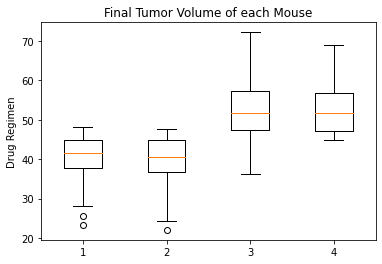

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each Mouse")
ax1.set_ylabel("Drug Regimen")
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = mouse_study_no_duplicates.loc[mouse_study_no_duplicates["Drug Regimen"]== "Capomulin"]
mouse_treatment = capomulin_treatment.loc[capomulin_treatment["Mouse ID"]== "1509"]
capomulin_treatment["Mouse ID"].value_counts()

# plt.plot(mouse_treatment["Timepoint"], mouse_treatment["Drug Regimen"])
# plt.xlabel("Tumor Volume mm3")
# plt.ylabel("Timepoint")
# plt.xlim([0,50])
# plt.ylim([40,50])
# plt.show()


s185    1
b742    1
i557    1
r944    1
l509    1
s710    1
g316    1
v923    1
w150    1
j119    1
j246    1
b128    1
l897    1
x401    1
g288    1
w914    1
i738    1
t565    1
m957    1
r554    1
y793    1
u364    1
f966    1
m601    1
r157    1
Name: Mouse ID, dtype: int64

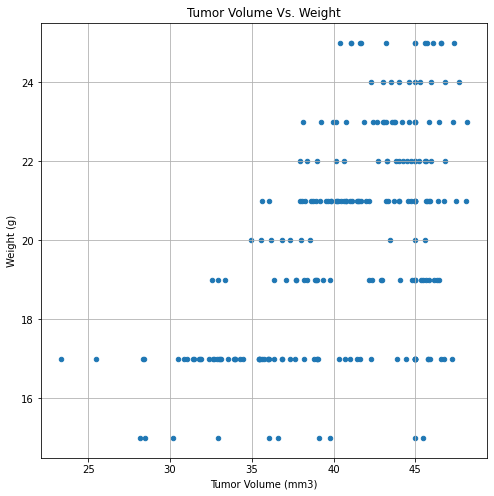

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment = another_adjusted_mouse_data.loc[another_adjusted_mouse_data["Drug Regimen"]== "Capomulin"]
capomulin_average = capomulin_treatment.groupby(["Mouse ID"]).mean()

capomulin_treatment.plot(kind="scatter", x="Tumor Volume (mm3)", y="Weight (g)", grid=True, figsize=(8,8), title="Tumor Volume Vs. Weight")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
## matplotlib day 3 activity 6+

# income = wdi_data.iloc[:,1]
# measles = wdi_data.iloc[:,12]
# correlation = st.pearsonr(income,measles)
# plt.scatter(income,measles)
# plt.xlabel('Income Per Capita')
# plt.ylabel('% Measles Immunization')
# print(f"The correlation between both factors is {round(correlation[0],2)}")
# plt.show()


NameError: name 'wdi_data' is not defined